# Bank Churn Analysis and ML

Este dataset fue obtenido de Kaggel: https://www.kaggle.com/datasets/radheshyamkollipara/bank-customer-churn/data

Así mismo he de aclarar que la palabra "churn" la he traducido como "abandono".

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib as plt
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("Customer-Churn-Records.csv")

FileNotFoundError: [Errno 2] No such file or directory: 'Customer-Churn-Records.csv'

In [ ]:
df.shape

(10000, 18)

In [ ]:
df.drop_duplicates()
df.shape

(10000, 18)

In [ ]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   RowNumber           10000 non-null  int64  
 1   CustomerId          10000 non-null  int64  
 2   Surname             10000 non-null  object 
 3   CreditScore         10000 non-null  int64  
 4   Geography           10000 non-null  object 
 5   Gender              10000 non-null  object 
 6   Age                 10000 non-null  int64  
 7   Tenure              10000 non-null  int64  
 8   Balance             10000 non-null  float64
 9   NumOfProducts       10000 non-null  int64  
 10  HasCrCard           10000 non-null  int64  
 11  IsActiveMember      10000 non-null  int64  
 12  EstimatedSalary     10000 non-null  float64
 13  Exited              10000 non-null  int64  
 14  Complain            10000 non-null  int64  
 15  Satisfaction Score  10000 non-null  int64  
 16  Card 

- Ya no hay valores nulos ni duplicados.
- En este caso nuestro objetivo es analizar y predecir la variable "Exited" que más adelante pasaré a llamar "Churn".

# Data Cleaning


Eliminamos columnas que no van a aportar al análisis ni al modelado.

In [ ]:
df.drop(columns=["RowNumber", "CustomerId", "Surname"], axis=1, inplace=True)

In [ ]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


# Data Transformation

Vamos a transformar las columnas que deberían tener el tipo "category" para que más adelante, tanto en el apartado de EDA como en la selección de Features y ML tengamos una mejor optimización.

In [ ]:
new_df = df.copy()

In [ ]:
new_df.rename(columns={"Exited":"Churn"}, inplace=True)

In [ ]:
new_df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Churn,Complain,Satisfaction Score,Card Type,Point Earned
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


In [ ]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CreditScore         10000 non-null  int64  
 1   Geography           10000 non-null  object 
 2   Gender              10000 non-null  object 
 3   Age                 10000 non-null  int64  
 4   Tenure              10000 non-null  int64  
 5   Balance             10000 non-null  float64
 6   NumOfProducts       10000 non-null  int64  
 7   HasCrCard           10000 non-null  int64  
 8   IsActiveMember      10000 non-null  int64  
 9   EstimatedSalary     10000 non-null  float64
 10  Churn               10000 non-null  int64  
 11  Complain            10000 non-null  int64  
 12  Satisfaction Score  10000 non-null  int64  
 13  Card Type           10000 non-null  object 
 14  Point Earned        10000 non-null  int64  
dtypes: float64(2), int64(10), object(3)
memory usage: 1.1+

In [ ]:
variables_cat = ["Tenure", "Geography", "Gender", "NumOfProducts", "HasCrCard", "IsActiveMember", "Complain", "Satisfaction Score", "Card Type"]

In [ ]:
new_df[variables_cat] = new_df[variables_cat].astype("category")
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   CreditScore         10000 non-null  int64   
 1   Geography           10000 non-null  category
 2   Gender              10000 non-null  category
 3   Age                 10000 non-null  int64   
 4   Tenure              10000 non-null  category
 5   Balance             10000 non-null  float64 
 6   NumOfProducts       10000 non-null  category
 7   HasCrCard           10000 non-null  category
 8   IsActiveMember      10000 non-null  category
 9   EstimatedSalary     10000 non-null  float64 
 10  Churn               10000 non-null  int64   
 11  Complain            10000 non-null  category
 12  Satisfaction Score  10000 non-null  category
 13  Card Type           10000 non-null  category
 14  Point Earned        10000 non-null  int64   
dtypes: category(9), float64(2), int64(4)


Verificamos que todos los datos tengan el tipo correspondiente y esté todo en orden.

In [ ]:
secciones = [0,10,20,30,40,50,60,70,80,90,100]
labelss = ["0-10", "11-20", "21-30","31-40", "41-50", "51-60", "61-70", "71-80", "81-90", "90+"]

In [ ]:
new_df["Edades"] = pd.cut(new_df["Age"], secciones,labels=labelss, include_lowest=True)

In [ ]:
new_df.head(20)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Churn,Complain,Satisfaction Score,Card Type,Point Earned,Edades
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464,41-50
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456,41-50
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377,41-50
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350,31-40
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425,41-50
5,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1,1,5,DIAMOND,484,41-50
6,822,France,Male,50,7,0.00,2,1,1,10062.80,0,0,2,SILVER,206,41-50
7,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1,1,2,DIAMOND,282,21-30
8,501,France,Male,44,4,142051.07,2,0,1,74940.50,0,0,3,GOLD,251,41-50
9,684,France,Male,27,2,134603.88,1,1,1,71725.73,0,0,3,GOLD,342,21-30


In [ ]:
new_df.dtypes

CreditScore              int64
Geography             category
Gender                category
Age                      int64
Tenure                category
Balance                float64
NumOfProducts         category
HasCrCard             category
IsActiveMember        category
EstimatedSalary        float64
Churn                    int64
Complain              category
Satisfaction Score    category
Card Type             category
Point Earned             int64
Edades                category
dtype: object

En este caso he dividido la edad en rangos de 10 años, posteriormente en el entrenamiento de los modelos de ML nos va a ser muy util, ya que, y spoiler alert, consume menos poder de cómputo y tiene resultados iguales que utilizarlo como una variable numérica, pero por el momento en el EDA quiero analizarlo como ambos.

# EDA

Vamos a empezar a analizar la variable dependiente, en este caso es "Churn".

In [ ]:
print(new_df["Churn"].value_counts())
print("\nPorcentaje:")
print(new_df["Churn"].value_counts()/len(new_df)*100)

Churn
0    7962
1    2038
Name: count, dtype: int64

Porcentaje:
Churn
0    79.62
1    20.38
Name: count, dtype: float64


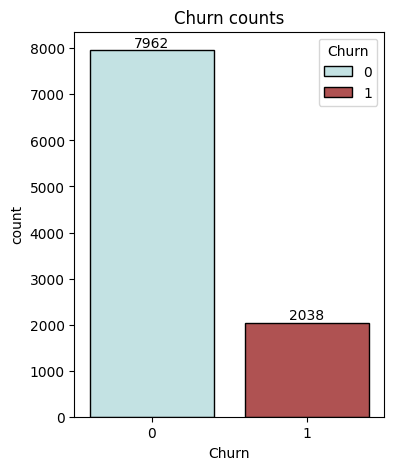

In [ ]:
plt.figure(figsize=(4,5))
ax = sns.countplot(data=new_df, x="Churn", palette=['#bee7e8', '#bf4342'], edgecolor="black", hue="Churn")
plt.title("Churn counts")
for container in ax.containers:
    ax.bar_label(container)
plt.show()


Tenemos que las personas que *abandonan* son el 26.38%, mientras que los clientes que siguen comprando son el 73.62%. O una relación 26:74 aproximadamente.

## EDA Categorical Values

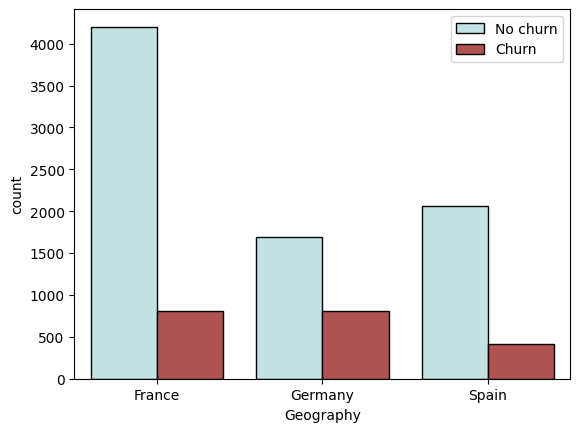

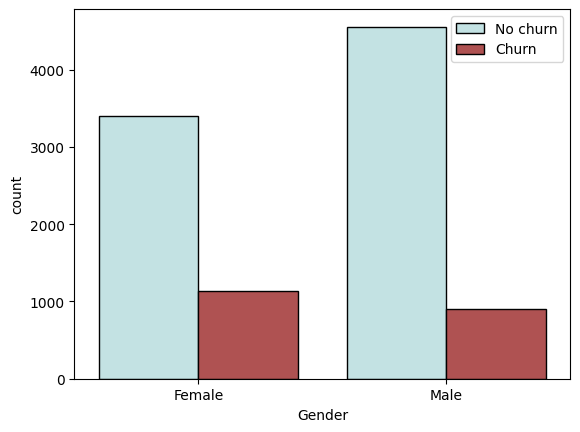

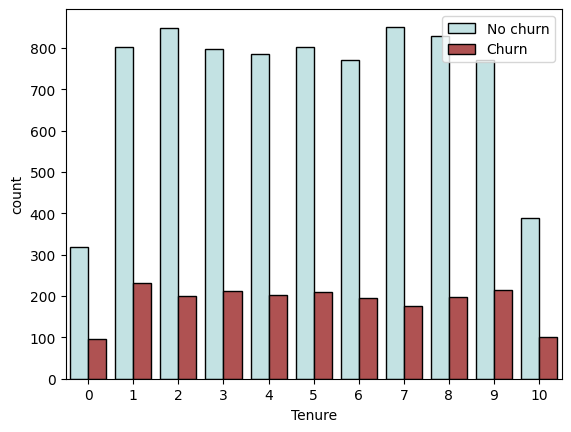

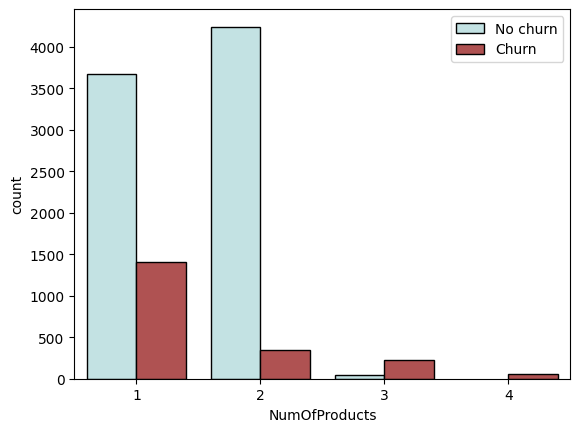

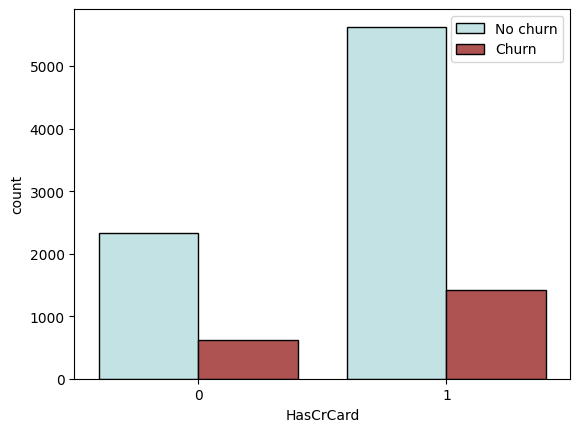

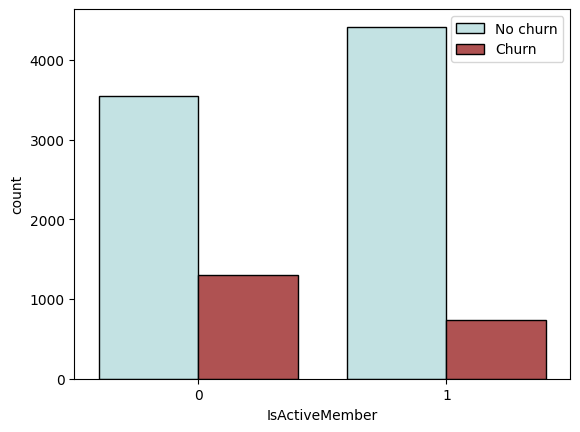

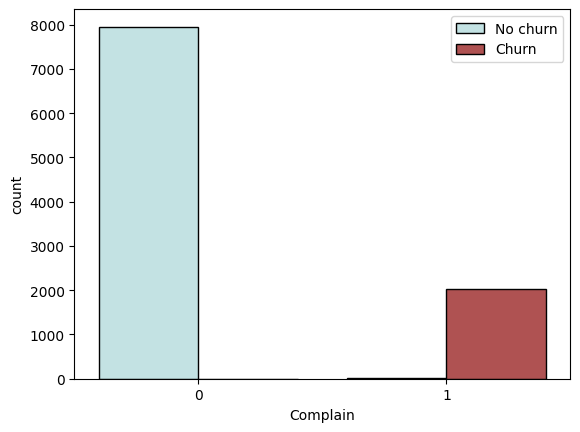

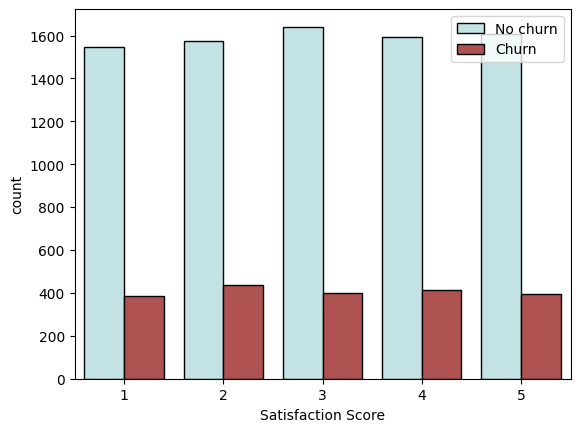

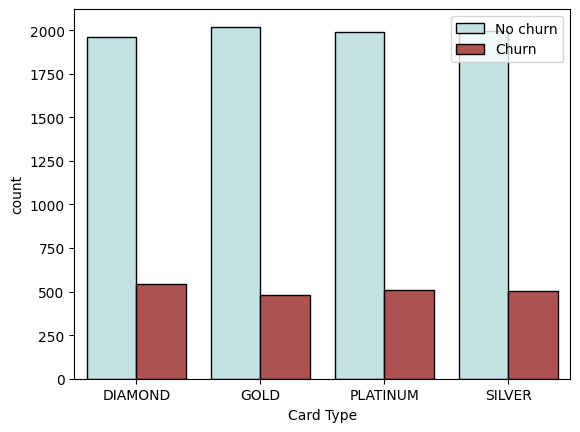

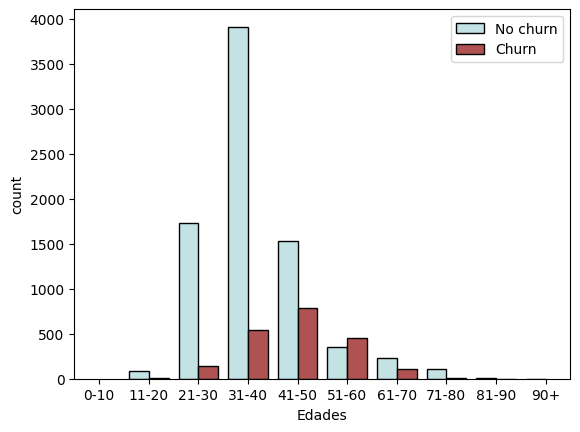

In [ ]:
for i, predicor in enumerate(new_df.select_dtypes("category")):
    plt.figure(i)
    sns.countplot(data=new_df, x=predicor, hue="Churn", palette=['#bee7e8', '#bf4342'], edgecolor="black")
    plt.legend(["No churn", "Churn"])
    plt.show()

## EDA Numeric Values

In [ ]:
new_df["Churn"] = new_df["Churn"].astype("category")

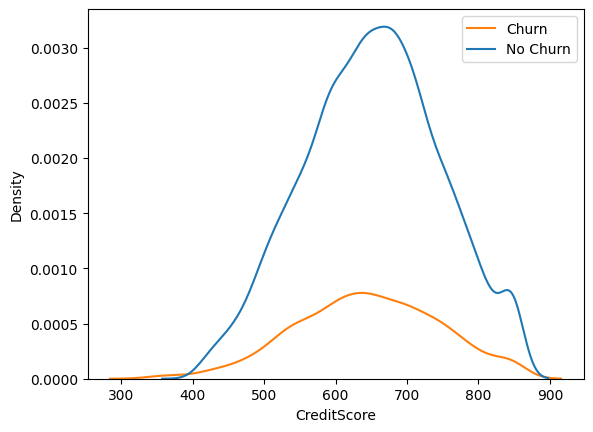

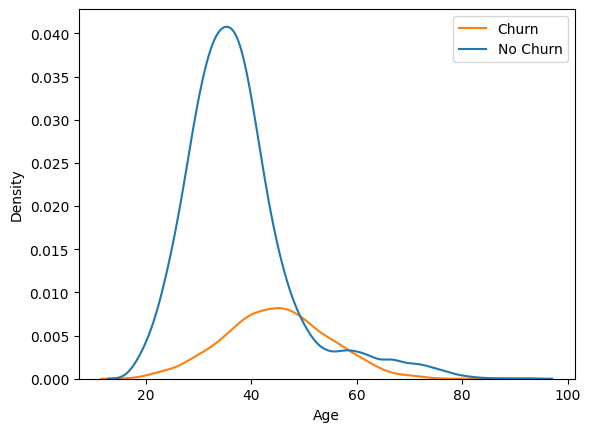

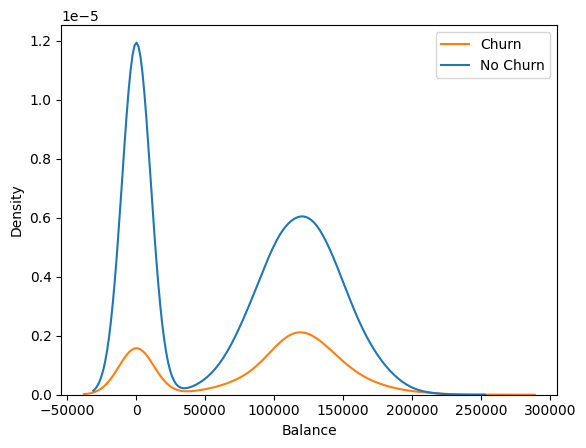

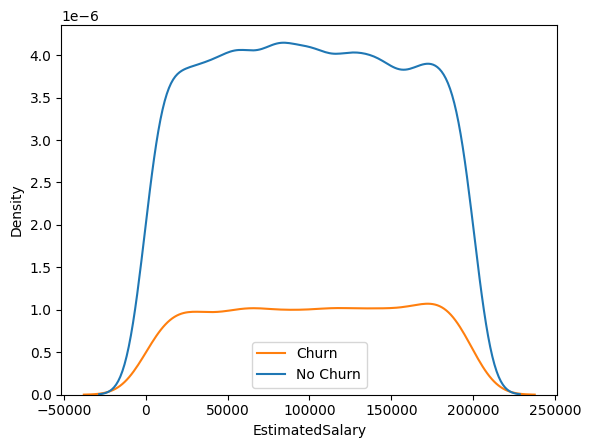

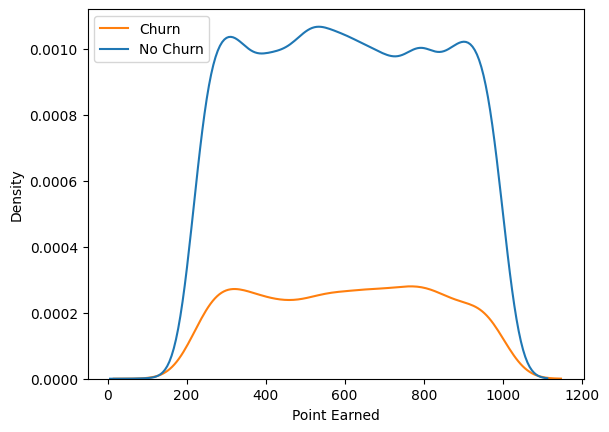

In [ ]:
for i, predicor in enumerate(new_df.select_dtypes("number")):
    plt.figure(i)
    sns.kdeplot(data=new_df, x=predicor, hue="Churn")
    plt.legend(["Churn", "No Churn"])
    plt.show()

### Insights

- Podemos observar que el grupo de edad que más *abandona* 30 años a los 60 años.
- Los productos 3 y 4 tienen más personas que *abandonan* que usuarios activos casi en un 100%.
- Si una persona ha hecho alguna queja es probable, casi en un 100%, que va a *abandonar*.
- Las personas que viven en Alemania *abandonan* la compañía con más frecuencia.
- Las mujeres tienen a *abandonar* los servicios más que los hombres.

## Correlation Analysis

Utilizamos la función de pandas "get_dummies" para hacer una codificación One-hot, esto para que nos sea posible analizar la correlación entre las variables categóricas y las numéricas, y ver si existen variables independientes similares (>0.8) para descartar una de ellas, ya que no aportaría mucho a los modelos de ML.

In [ ]:
new_df["Churn"] = new_df["Churn"].astype("int64")

In [ ]:
new_df_dummies = pd.get_dummies(new_df, dtype=int)
new_df_dummies.head()

,CreditScore,Age,Balance,EstimatedSalary,Churn,Point Earned,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,...,Edades_0-10,Edades_11-20,Edades_21-30,Edades_31-40,Edades_41-50,Edades_51-60,Edades_61-70,Edades_71-80,Edades_81-90,Edades_90+
0,619,42,0.00,101348.88,1,464,1,0,0,1,...,0,0,0,0,1,0,0,0,0,0
1,608,41,83807.86,112542.58,0,456,0,0,1,1,...,0,0,0,0,1,0,0,0,0,0
2,502,42,159660.80,113931.57,1,377,1,0,0,1,...,0,0,0,0,1,0,0,0,0,0
3,699,39,0.00,93826.63,0,350,1,0,0,1,...,0,0,0,1,0,0,0,0,0,0
4,850,43,125510.82,79084.10,0,425,0,0,1,1,...,0,0,0,0,1,0,0,0,0,0


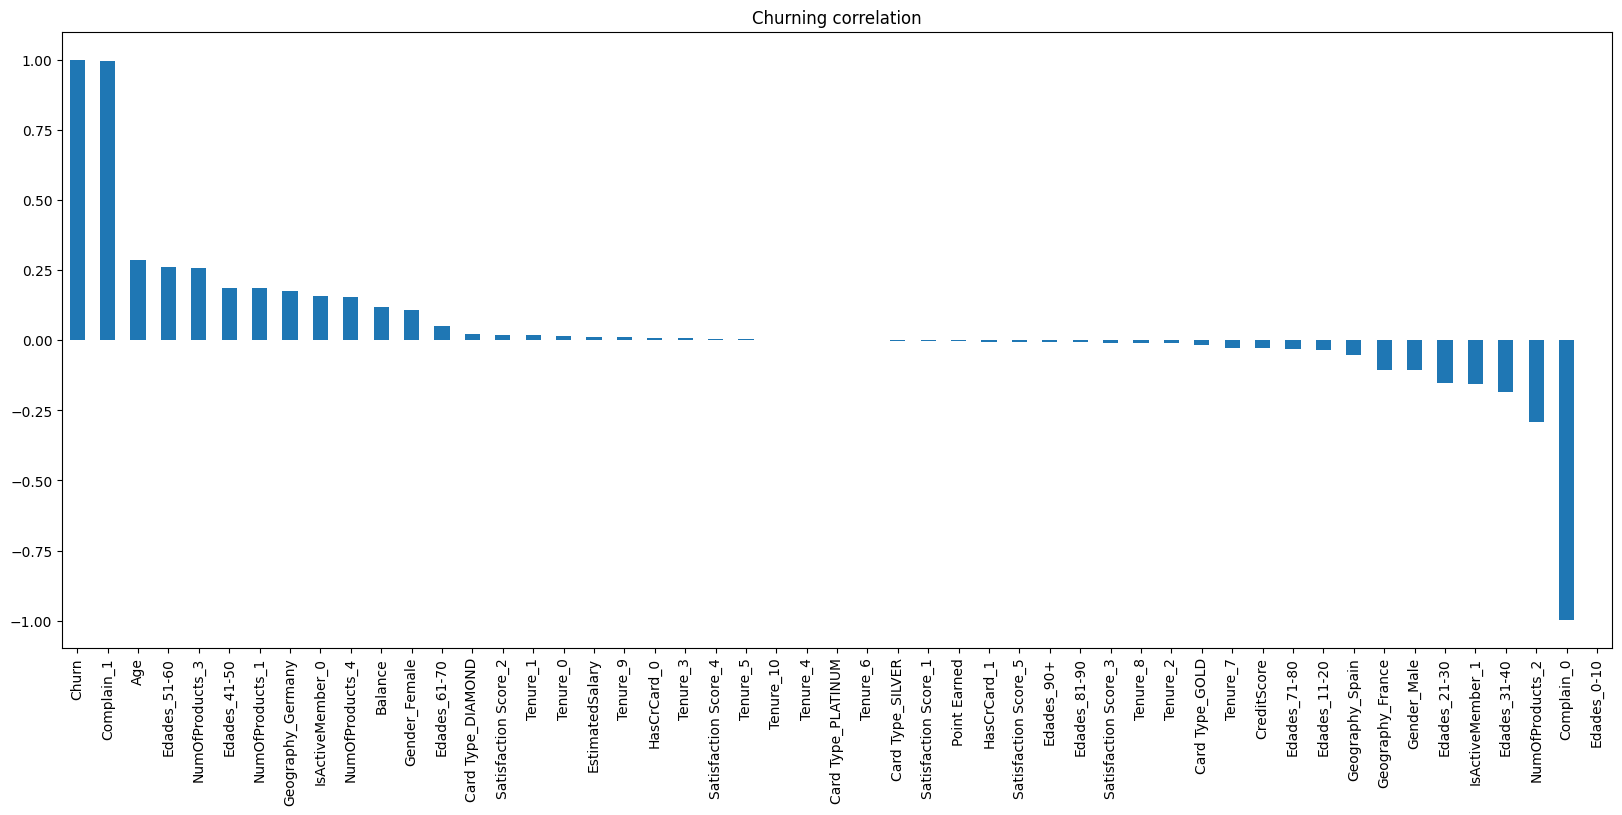

In [ ]:
plt.figure(figsize=(20,8))
plt.title("Churning correlation")
new_df_dummies.corr()["Churn"].sort_values(ascending=False).plot(kind="bar")
plt.show()

### Insights

- Como describimos anteriormente las quejas están extremadamente relacionadas con el *abandono* de los usuarios.
- Podemos ver que hay correlación entre las personas entre los 41 años y 60 años con el *abandono* de la compañía.
- Las personas que están entre 21 y 40 años tienen una notoria correlación negativa con el *abandono*.
- Las personas activas son menos propensas a *abandonar*.
- **La cantidad de tiempo** que llevan en la compañía, el **tipo de tarjeta de crédito** que utilicen y el **salario estimado** precticamente no tienen influencia en si *abandonan* o no.

In [ ]:
new_df_dummies.drop(columns=["Age", "Edades_0-10"], axis=1, inplace=True)

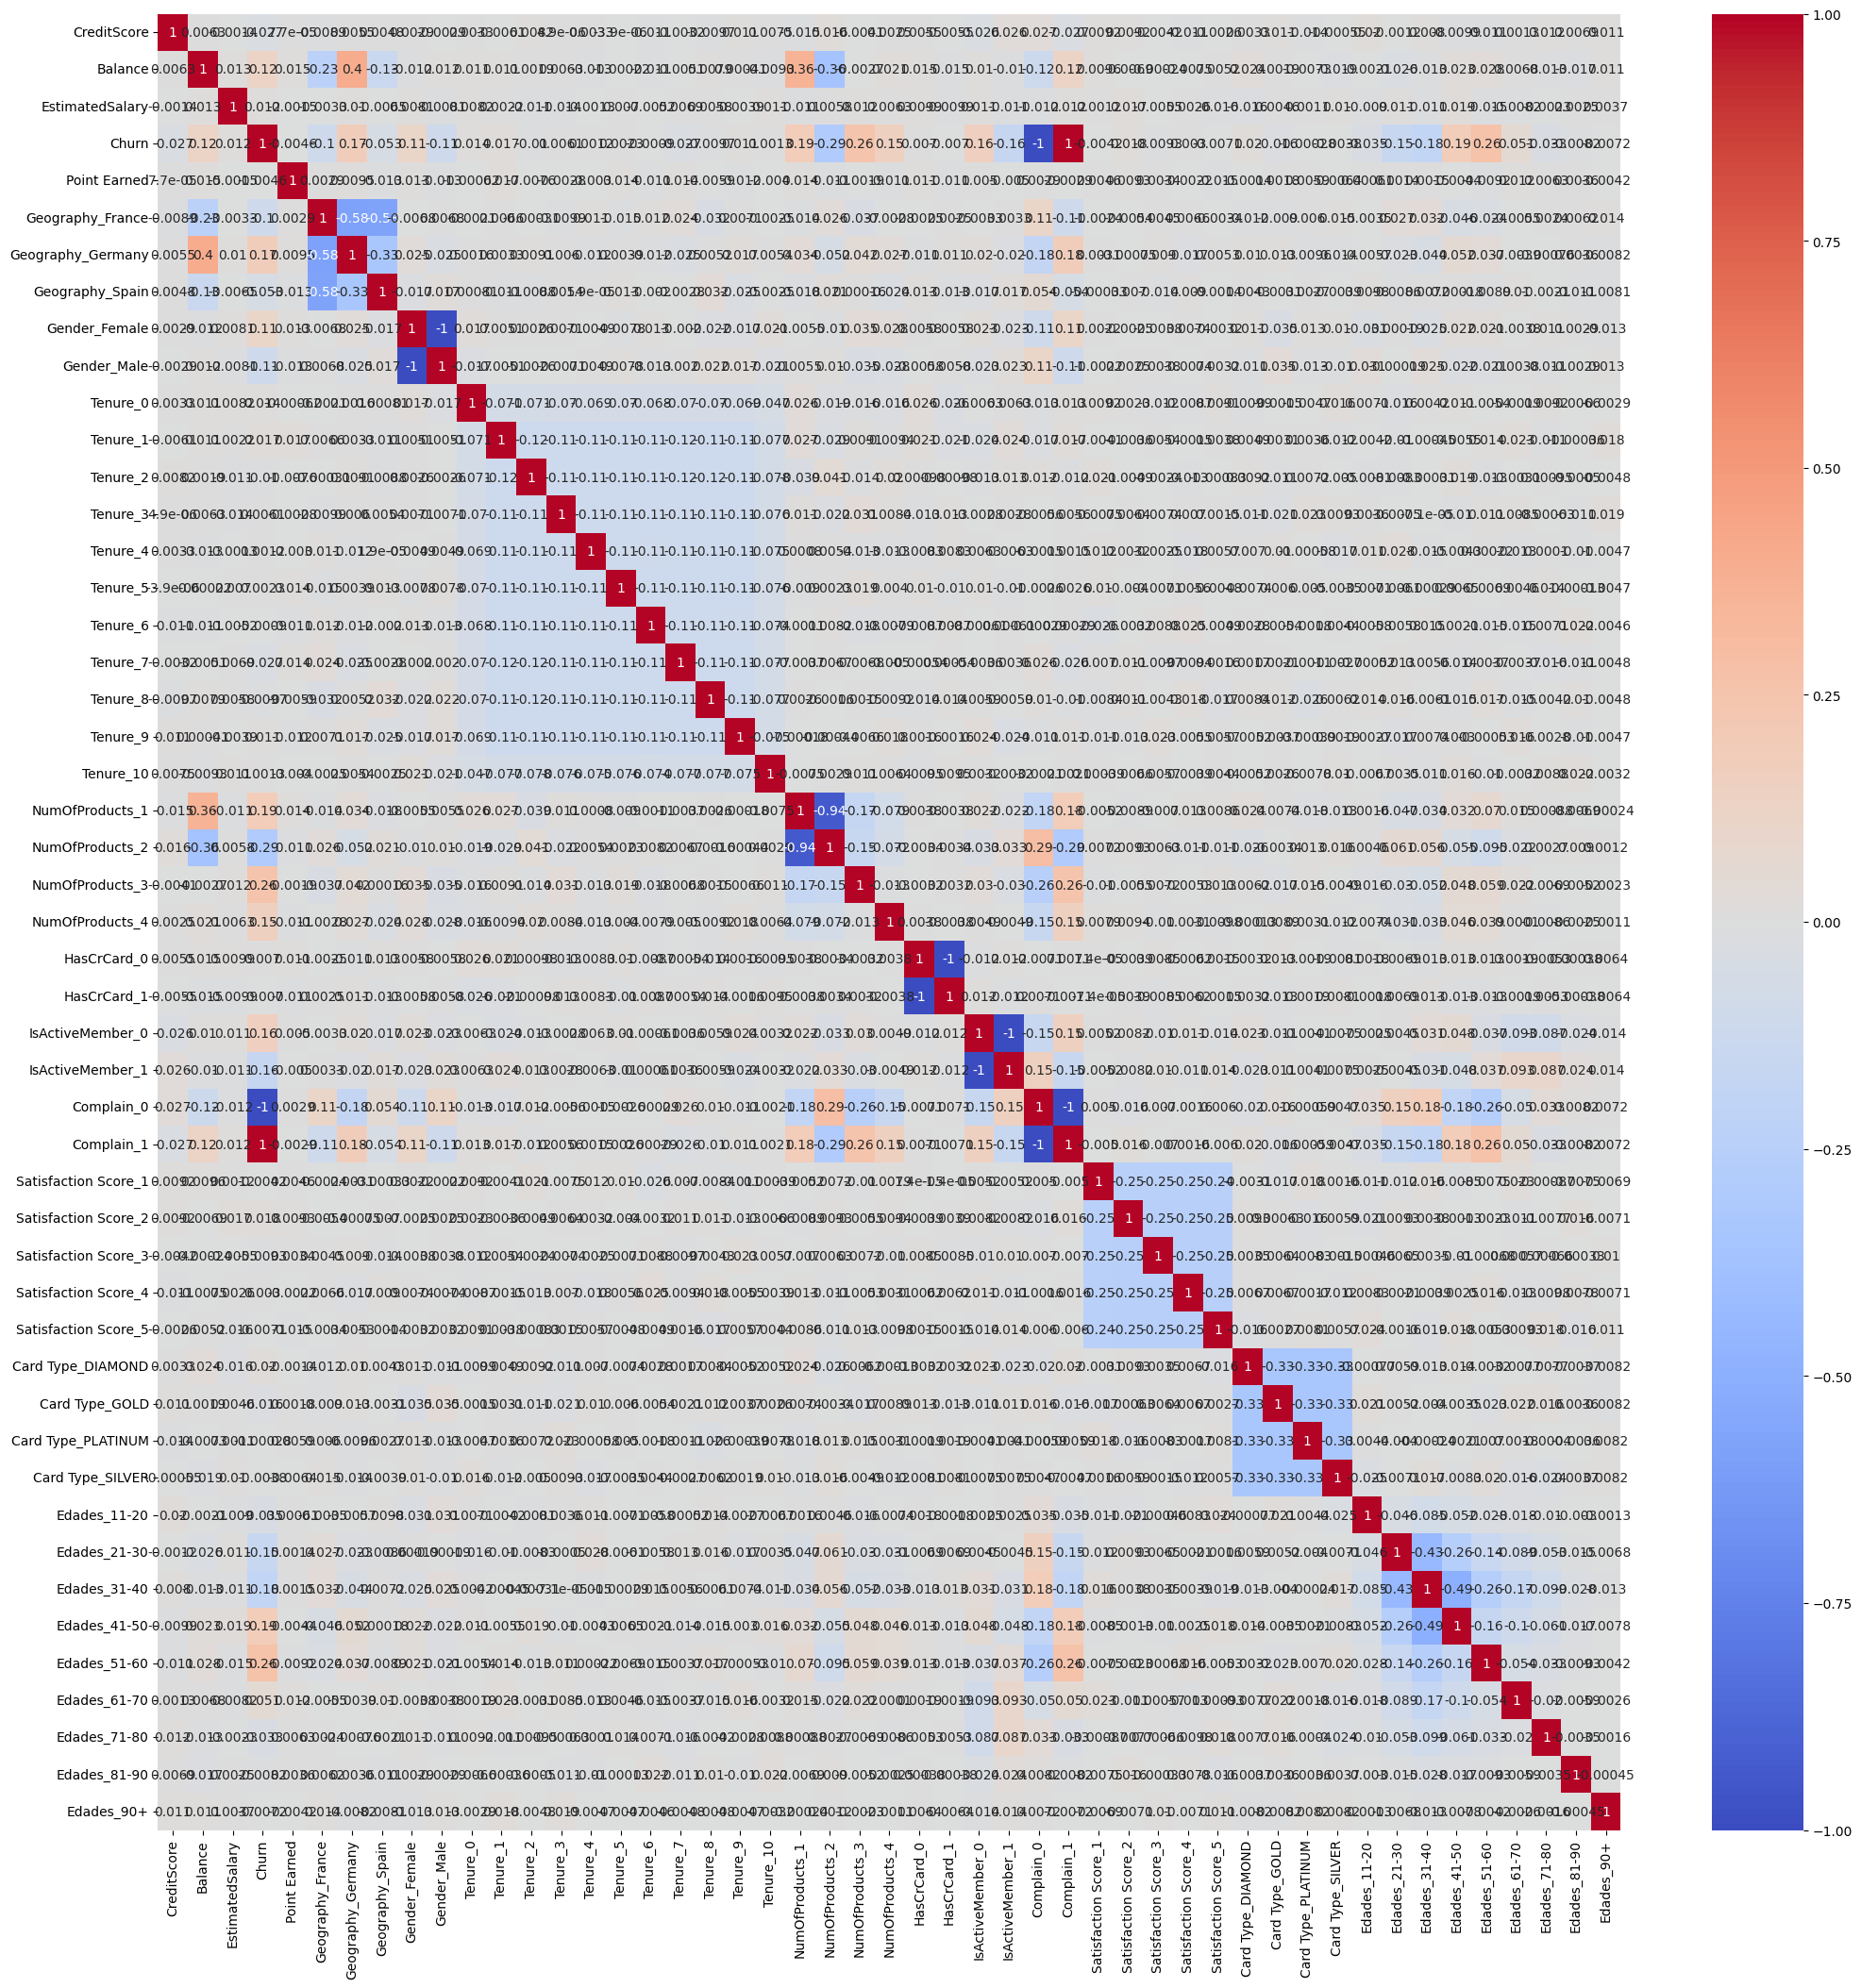

In [ ]:
corrrelation_m = new_df_dummies.corr()

plt.figure(figsize=(25,25))
sns.heatmap(corrrelation_m, cmap="coolwarm", annot=True)
plt.show()

En algunos valores categóricos de "verdadero" y "falso" como con "Complain" o "Gender" la correlación es directamente 1, pero al momento de codificar con los dummies y la eliminación de una de las columnas va a solucionarse esa redundancia, por lo tanto, no tuvimos valores por encima del 0.8, lo que indica que entre las variables independientes no habrá que eliminar ninguna.

## Churn vs No churn Analysis

In [ ]:
new_df["Churn"].value_counts()

Churn
0    7962
1    2038
Name: count, dtype: int64

In [ ]:
num_vars = ["CreditScore", "Balance", "Point Earned", "EstimatedSalary", "Age"]
grupo1 = new_df[new_df["Churn"] == 1]
grupo2 = new_df[new_df["Churn"] == 0]

Voy a dividir el dataset entre las personas que abandona y no para hacer las gráficas y contrastar entre estos dos grupos.

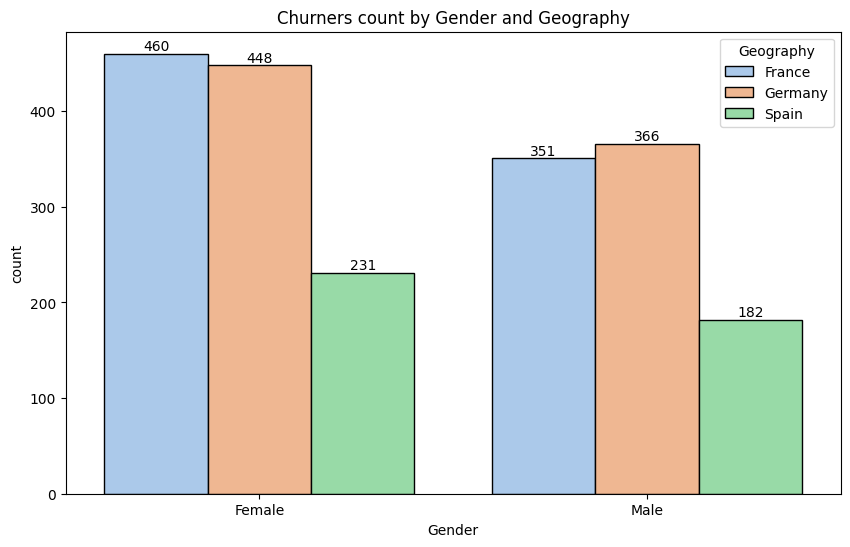

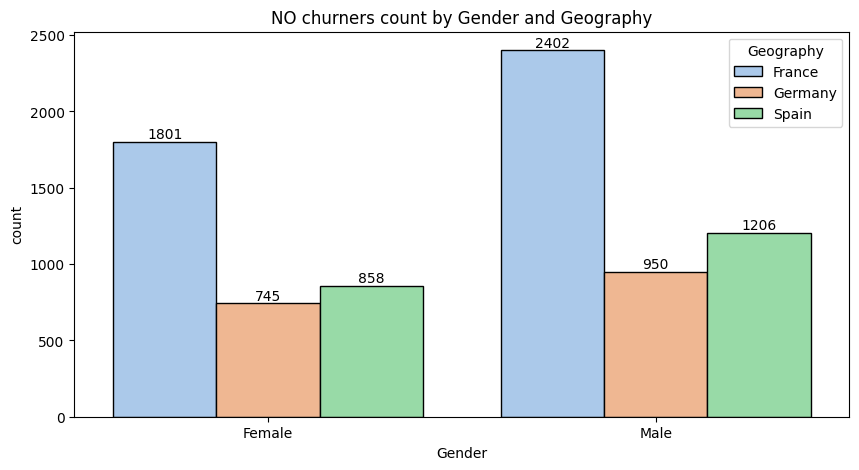

In [ ]:
plt.figure(figsize=(10,6))
ax = sns.countplot(data=grupo1, x="Gender", hue="Geography", palette="pastel", edgecolor="black")
plt.title("Churners count by Gender and Geography")
for container in ax.containers:
    ax.bar_label(container)
plt.show()

plt.figure(figsize=(10,5))
ax = sns.countplot(data=grupo2, x="Gender", hue="Geography", palette="pastel", edgecolor="black")
plt.title("NO churners count by Gender and Geography")
for container in ax.containers:
    ax.bar_label(container)
plt.show()

- Observamos que Alemania y Francia tienen la mayor cantidad de personas que *abandonan* la compañía, sin embargo, proporcionalmente Alemania es mayor su taza de abandono, 37.2% para las mujeres y 27.8% para los hombres.
- Volvemos a apreciar que las mujeres son más propensas a *abandonar*que los hombres.

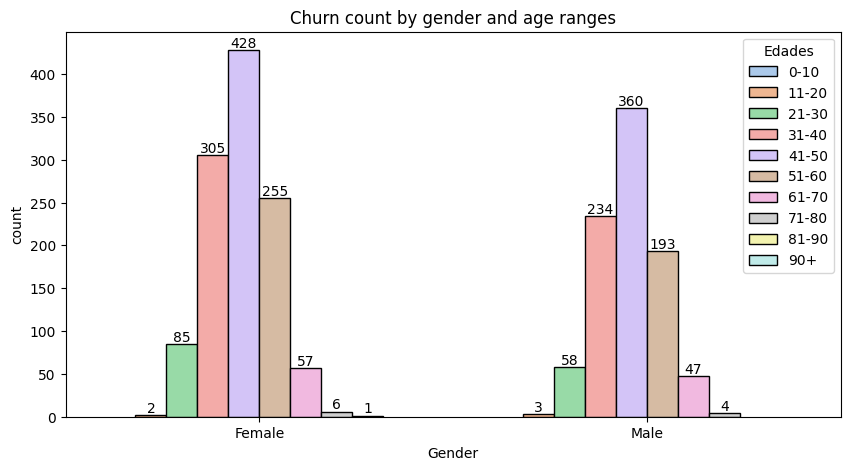

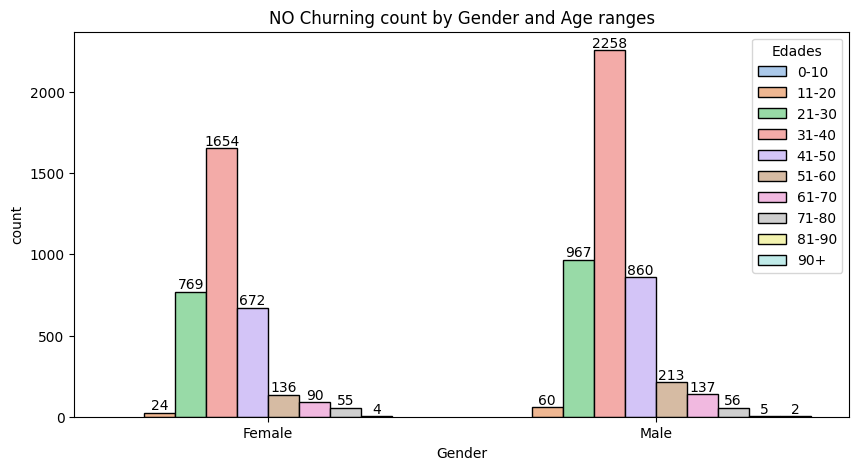

In [ ]:
plt.figure(figsize=(10,5))
ax = sns.countplot(data=grupo1, x="Gender", hue="Edades", palette="pastel", edgecolor="black")
plt.title("Churn count by gender and age ranges")
for container in ax.containers:
    ax.bar_label(container)
plt.show()
plt.figure(figsize=(10,5))
ax = sns.countplot(data=grupo2, x="Gender", hue="Edades", palette="pastel", edgecolor="black")
plt.title("NO Churning count by Gender and Age ranges")
for container in ax.containers:
    ax.bar_label(container)
plt.show()

### Insigths

- 38.9% de las mujeres de entre 41 a 50 años han *abandonado*.
- 65.2% de las mujeres de entre 51 a 60 años han *abandonado*.

- 29.5% de los hombres de entre 41 a 50 años han *abandonado*.
- 47.5% de los hombres de entre 51 a 60 años han *abandonado*.


Reafirmamos que el rango de edades entre 41 a 50 años es la que más abandona. y los que menos (en proporción) de entre 21 a 40 años.


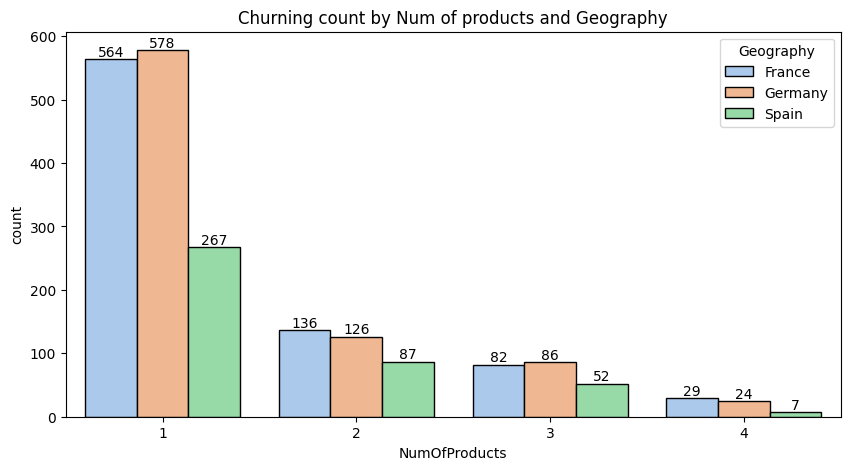

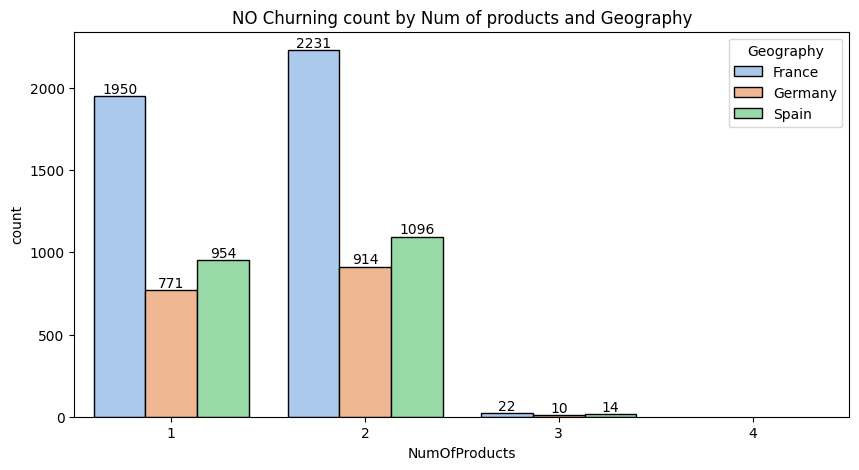

In [ ]:
order_geos = ['France', 'Germany', 'Spain']

plt.figure(figsize=(10,5))
ax = sns.countplot(data=grupo1, x="NumOfProducts", hue="Geography", palette="pastel", edgecolor="black", hue_order=order_geos)
plt.title("Churning count by Num of products and Geography")
for container in ax.containers:
    ax.bar_label(container)
plt.show()

plt.figure(figsize=(10,5))
ax = sns.countplot(data=grupo2, x="NumOfProducts", hue="Geography", palette="pastel", edgecolor="black", hue_order=order_geos)
plt.title("NO Churning count by Num of products and Geography")
for container in ax.containers:
    ax.bar_label(container)
plt.show()

### Insights

- En total el 27.7% de los usuarios del primer producto lo han *abandonado*.
- El 22% de los franceses han *abandonado* el primer producto.
- El 44% de los alemanes han *abandonado* el primer producto.
- El 21% de los alemanes han *abandonado* el primer producto.

Independiente de la región los números de productos 3 y 4 siempre son *abandonados*.

El número de productos que menos es *abandonado* es el 2, sobre todo en Francia.

## Conclusiones Generales

Personas que **más** *abandonan* en proporción:

- Mujeres.
- Gente de 51 a 60 años (seguidos de gente entre 41 a 50 años).
- Alemanes.
- Los números de productos 3 y 4 independientemente del género y región. Es seguido por el 1.
- Casi el 100% de la gente que emitió una queja.

Personas que **menos** *abandonan* en proporción:

- Hombres.
- Gente de entre 31 y 40 años (seguidos de 21 a 30 años).
- Franceses.
- El número de producto que menos *abandonan* es el 2.
- Las personas activas tienden a *abandonar* menos.